# Problem 3: RBF network

Firstly, let's import the existing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from utils.data_parser import prepare_datasource
from utils.utilities import compute_cost, compute_accuracy, plot_data, plot_analysis, plot_full_analysis, plot_data_in_comparison #bring these utilities helpers from A1


Then, split out the datasource into training and test data with the ratio of 8:2. Notice that the datasource is generated exactly once and is stored for later use in 2 files, training_data.csv and training_labels.csv

In [2]:
X, y = prepare_datasource()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False)

The plot of the entire dataset is visualized as follow:

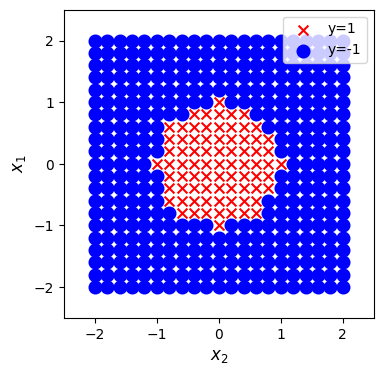

In [3]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X, y, ax, s=50)
ax.axis([-2.5, 2.5, -2.5, 2.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_2$', fontsize=12)
plt.show()

The spread parameters are preset as follow

In [4]:
radius_values = [0.5, 1., 2., 5., 10., 20., 30., 40., 50., 60., 70., 80., 90., 100., 120.]

Firstly, let's compute the gaussian matrix $$g_j=gaussian(d_j)=e^{\frac{-{d_j}^2}{2\sigma^2}}$$ where 
$d_j = ||X-c_j||$ and $c_j$ is each element in centers

In [5]:
def compute_gaussian_matrix(X, centers, width):
    gj = np.zeros((centers.shape[0], X.shape[0]))
    for c_idx,cj in enumerate(centers):
        for  input_idx,input in enumerate(X):
            dj = np.linalg.norm(input-cj)
            yj = np.exp(-dj**2/(2*(width**2)))
            gj[c_idx, input_idx] = yj
    return gj

Next, $g_j$ is then fed into the linear regression model with proper weights to compute the output $$Y=\sum_{j=1}^n{w_jg_j}$$

In [6]:
def compute_output(X, weights, centers, width):
    G = compute_gaussian_matrix(X, centers, width)
    Y = np.matmul(weights, G)
    return Y

We now compute the weight matrix using gaussian matrix $G$ and the targets $Y$ by the formula:

$$W = G^{+}Y$$
where $G^{+}$ is the pseudo-inverse matrix of G

In [7]:
def compute_weight(X, Y, centers, width):
    G = compute_gaussian_matrix(X, centers, width)
    W = np.matmul(Y, np.linalg.pinv(G))
    return W

## Part 1
Carry out the design of RBF NN based on Gaussian kernel functions with constant spread function and using all
the points in the training set as centers of the RB functions. Compare the performance results (mean square
error) as you vary the spread parameter while keeping it the same for all kernel functions. Discuss your findings.

In [8]:
all_circle_cost = []
all_circle_accuracy = []
saved_y_pred=[]
for idx, radius in enumerate(radius_values):
    W = compute_weight(X_train, y_train, X_train, radius) #find the weight using training data
    y_test_hat = compute_output(X_test, W, X_train, radius) #use testing set to compute prediction given the weight
    y_test_pred = np.sign(y_test_hat)
    cost = compute_cost(y_test_pred, y_test)
    accuracy = compute_accuracy(y_test_pred, y_test) * 100
    all_circle_cost.append(cost)
    all_circle_accuracy.append(accuracy)
    print(f"radius = {radius}   cost = {cost} testing accuracy = {accuracy}")
    if idx == 2.0:
        saved_y_pred = y_test_pred

radius = 0.5   cost = 1.1685393258426966 testing accuracy = 70.78651685393258
radius = 1.0   cost = 0.2247191011235955 testing accuracy = 94.3820224719101
radius = 2.0   cost = 0.1348314606741573 testing accuracy = 96.62921348314607
radius = 5.0   cost = 0.1797752808988764 testing accuracy = 95.50561797752809
radius = 10.0   cost = 0.1348314606741573 testing accuracy = 96.62921348314607
radius = 20.0   cost = 0.1797752808988764 testing accuracy = 95.50561797752809
radius = 30.0   cost = 0.1348314606741573 testing accuracy = 96.62921348314607
radius = 40.0   cost = 0.1348314606741573 testing accuracy = 96.62921348314607
radius = 50.0   cost = 0.1348314606741573 testing accuracy = 96.62921348314607
radius = 60.0   cost = 0.1348314606741573 testing accuracy = 96.62921348314607
radius = 70.0   cost = 0.1797752808988764 testing accuracy = 95.50561797752809
radius = 80.0   cost = 0.449438202247191 testing accuracy = 88.76404494382022
radius = 90.0   cost = 0.449438202247191 testing accuracy 

Let's try to visualize the testing dataset using prediction model, and compare it with the plot of the  training and testing data:

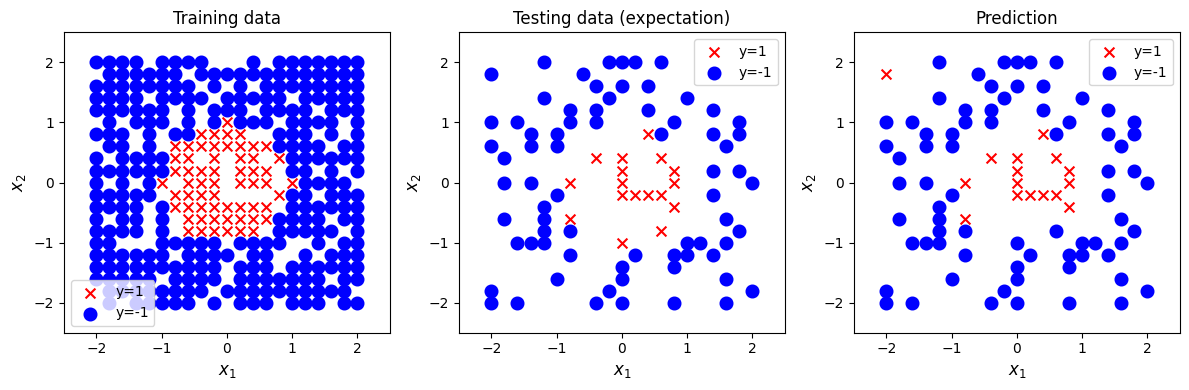

In [9]:
plot_data_in_comparison(X_train, y_train, X_test, y_test, X_test, saved_y_pred)

## Part 2
Perform the design of the RBF NN, using this time only 150 centers, choosing the centers using two approaches:

a) Randomly select the centers from the input data.
b) Use K-Means algorithm to find the centers. You can use a Kmeans function defined in sklearn (https://scikitlearn.
org/stable/modules/generated/sklearn.cluster.KMeans.html) or create your own.

## 2.a. Randomly pick 150 centers 

In [10]:
selected_centers_indices = np.random.choice(X_train.shape[0], size=150, replace=False)
selected_centers = X_train[selected_centers_indices, :]


Then, run the whole thing again given the above centers:

In [11]:
random_circle_cost = []
random_circle_accuracy = []
for idx,radius in enumerate(radius_values):
    W = compute_weight(X_train, y_train, selected_centers, radius)
    y_hat = compute_output(X_test, W, selected_centers, radius)
    y_pred = np.sign(y_hat)
    cost = compute_cost(y_pred, y_test)
    accuracy = compute_accuracy(y_pred, y_test) * 100
    random_circle_cost.append(cost)
    random_circle_accuracy.append(accuracy)
    print(f"radius = {radius}   cost = {cost}   testing accuracy = {accuracy}")
    if idx == 2.0:
        saved_y_pred = y_pred

radius = 0.5   cost = 0.1797752808988764   testing accuracy = 95.50561797752809
radius = 1.0   cost = 0.1797752808988764   testing accuracy = 95.50561797752809
radius = 2.0   cost = 0.0898876404494382   testing accuracy = 97.75280898876404
radius = 5.0   cost = 0.1797752808988764   testing accuracy = 95.50561797752809
radius = 10.0   cost = 0.1348314606741573   testing accuracy = 96.62921348314607
radius = 20.0   cost = 0.1797752808988764   testing accuracy = 95.50561797752809
radius = 30.0   cost = 0.1348314606741573   testing accuracy = 96.62921348314607
radius = 40.0   cost = 0.1348314606741573   testing accuracy = 96.62921348314607
radius = 50.0   cost = 0.1348314606741573   testing accuracy = 96.62921348314607
radius = 60.0   cost = 0.1348314606741573   testing accuracy = 96.62921348314607
radius = 70.0   cost = 0.1348314606741573   testing accuracy = 96.62921348314607
radius = 80.0   cost = 0.449438202247191   testing accuracy = 88.76404494382022
radius = 90.0   cost = 0.44943820

The visualization of training vs testing vs prediction data:

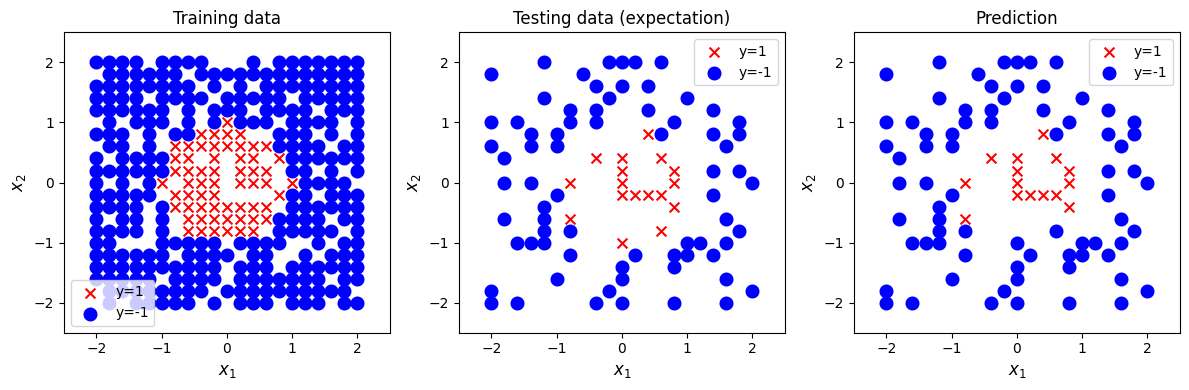

In [12]:
plot_data_in_comparison(X_train, y_train, X_test, y_test, X_test, saved_y_pred)

## 2.b. Use K-Means algorithm for selecting 150 centers 

In [13]:
kmeans = KMeans(n_clusters=150)
kmeans.fit(X_train)
kmean_centers = kmeans.cluster_centers_

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Finally, execute the program with the centers given by KMeans clusters

In [14]:
kmeans_circle_cost = []
kmeans_circle_accuracy = []
for idx, radius in enumerate(radius_values):
    W = compute_weight(X_train, y_train, kmean_centers, radius) #find the weight using training data
    y_hat = compute_output(X_test, W, kmean_centers, radius) #use testing set to compute prediction given the weight
    y_pred = np.sign(y_hat)
    cost = compute_cost(y_pred, y_test)
    accuracy = compute_accuracy(y_pred, y_test) * 100
    kmeans_circle_cost.append(cost)
    kmeans_circle_accuracy.append(accuracy)
    print(f"radius = {radius}   cost = {cost}   testing accuracy = {accuracy}")
    if idx == 2.0:
        saved_y_pred = y_pred

radius = 0.5   cost = 0.1348314606741573   testing accuracy = 96.62921348314607
radius = 1.0   cost = 0.1348314606741573   testing accuracy = 96.62921348314607
radius = 2.0   cost = 0.0898876404494382   testing accuracy = 97.75280898876404
radius = 5.0   cost = 0.1797752808988764   testing accuracy = 95.50561797752809
radius = 10.0   cost = 0.1348314606741573   testing accuracy = 96.62921348314607
radius = 20.0   cost = 0.1797752808988764   testing accuracy = 95.50561797752809
radius = 30.0   cost = 0.1348314606741573   testing accuracy = 96.62921348314607
radius = 40.0   cost = 0.1348314606741573   testing accuracy = 96.62921348314607
radius = 50.0   cost = 0.1348314606741573   testing accuracy = 96.62921348314607
radius = 60.0   cost = 0.1348314606741573   testing accuracy = 96.62921348314607
radius = 70.0   cost = 0.1797752808988764   testing accuracy = 95.50561797752809
radius = 80.0   cost = 0.449438202247191   testing accuracy = 88.76404494382022
radius = 90.0   cost = 0.44943820

Again, the comparision of training and testing data vs prediction data using the founded model can be illustrated below

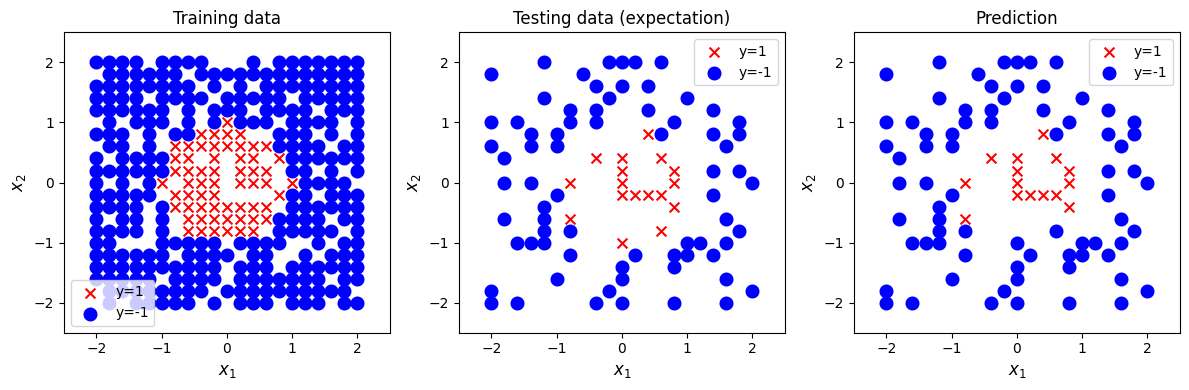

In [15]:
plot_data_in_comparison(X_train, y_train, X_test, y_test, X_test, saved_y_pred)

## Analysis
In the analysis section, we will discuss about the performance for each approach, including the cost and the accuracy of the testing data. 
### a. Full selection:
The diagrams of cost and accuracy of full-selection method are described below:


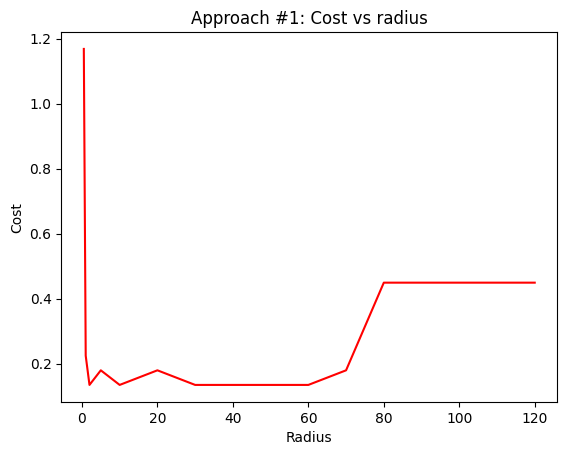

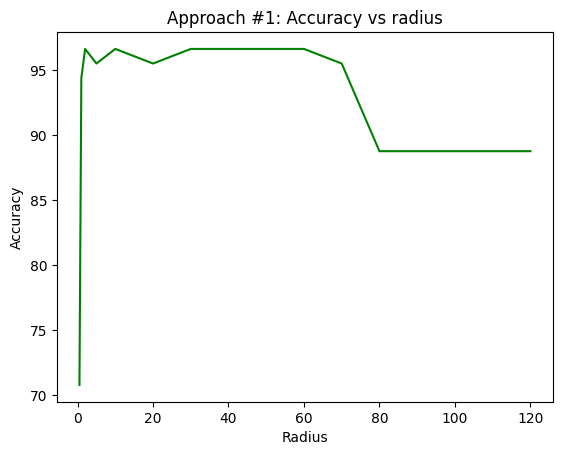

In [16]:
plot_analysis("Approach #1: Cost vs radius", "Cost", radius_values, all_circle_cost, 'r-', "Radius" )
plot_analysis("Approach #1: Accuracy vs radius", "Accuracy", radius_values, all_circle_accuracy, 'g-', "Radius" )

As we can see from the diagrams, the accuracy of this method reaches a peak and hover when $radius=[2.0, 60.0]$, at around 97%, whereas the accuracy hits the lowest when $radius$ is small (0.5), at only around 70%. The cost given this $radius$ is extremely high, at about 1.2.  The bigger the radius is, the less accurate the method become. From $radius=70$ onwards, both the cost and accuracy remain unchanged.

### b. Randomly select 150 centers
Similarly, the line charts are illustrated as follow

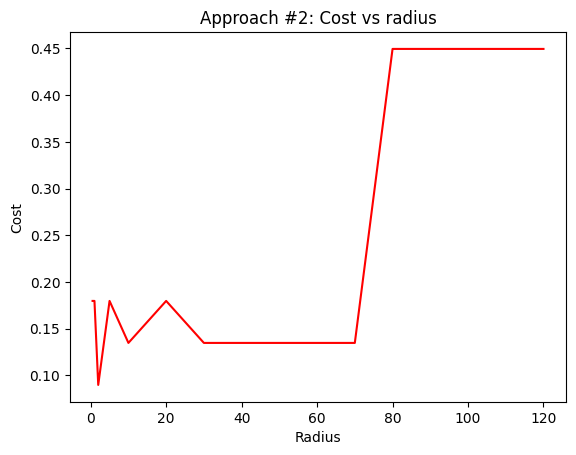

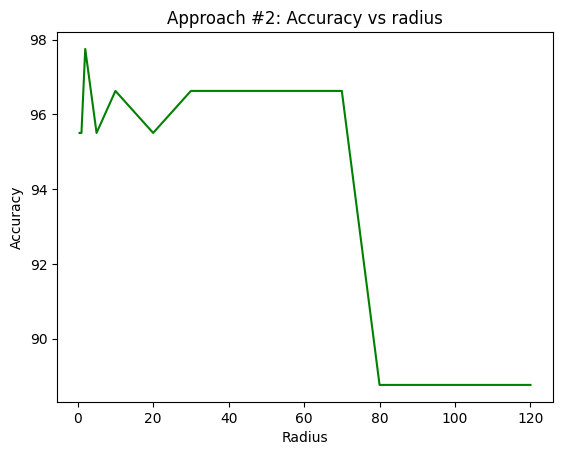

In [17]:
plot_analysis("Approach #2: Cost vs radius", "Cost", radius_values, random_circle_cost, 'r-', "Radius" )
plot_analysis("Approach #2: Accuracy vs radius", "Accuracy", radius_values, random_circle_accuracy, 'g-', "Radius" )

The similar pattern as the approach #1 can be seen in the approach #2, in which we achieve the highest accuracy when $radius=2.0$ (around 98%). The accuracy and cost of this solution when $radius$ is small (0.5) is a bit improved, with 96% and only 1.17, respectively. 

### c. 150 centers with Kmeans 
These diagrams show the cost and accuracy given 150 centers selected by Kmeans

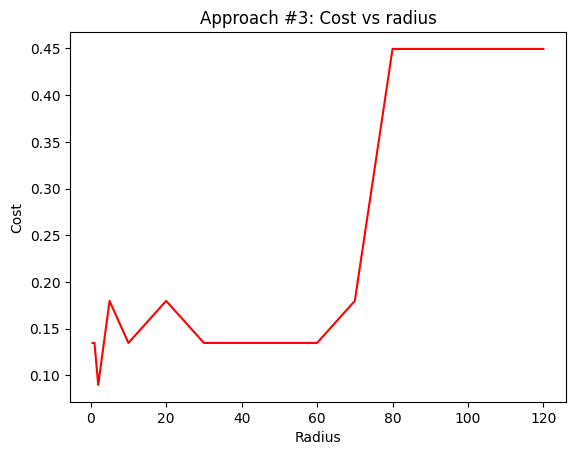

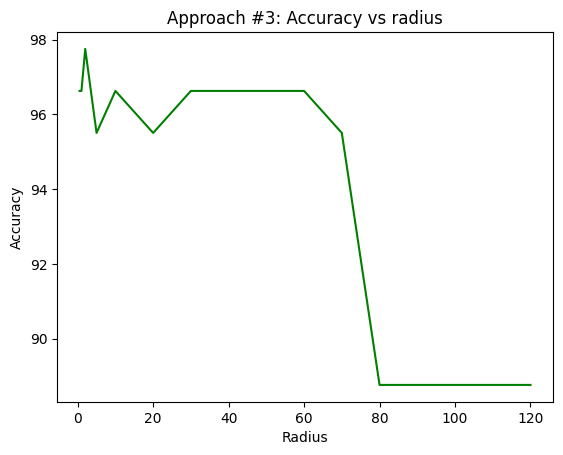

In [18]:
plot_analysis("Approach #3: Cost vs radius", "Cost", radius_values, kmeans_circle_cost, 'r-', "Radius" )
plot_analysis("Approach #3: Accuracy vs radius", "Accuracy", radius_values, kmeans_circle_accuracy, 'g-', "Radius" )

The figures for the approach #3 are similar to #2, with nearly 98% accuracy at the radius of 2.0. What is more, it provides the results with better analysis when $radius=0.5$ than #2. 

## Conclusion
Let put all diagrams together to compare their performance

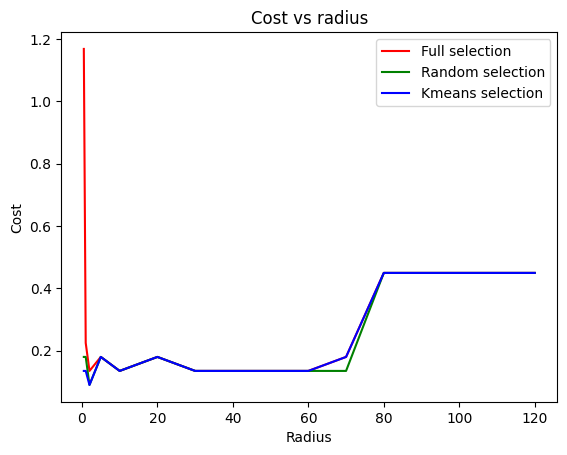

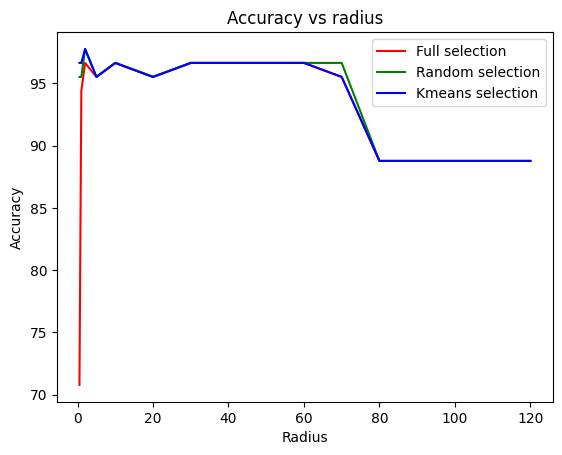

In [19]:
plot_full_analysis("Cost vs radius", "Cost", radius_values,  all_circle_cost, random_circle_cost, kmeans_circle_cost, 'red', 'green', 'blue', label1="Full selection", label2="Random selection", label3="Kmeans selection", x_label="Radius")
plot_full_analysis("Accuracy vs radius", "Accuracy", radius_values,  all_circle_accuracy, random_circle_accuracy, kmeans_circle_accuracy, 'red', 'green', 'blue', label1="Full selection", label2="Random selection", label3="Kmeans selection", x_label="Radius")

According to these diagrams, the Kmeans consistently works better than the others in terms of Cost and Accuracy throughout the test when $spead < 80$, while the performance of all approaches is identical in the remaining interval. In fact, when spread is small enough (less than 2.0), two 150-center approaches work more reliable, with $accuracy=98%$ and $cost=0.15$. Around $spread=2.0$, they continue to be the best candidate, while the full selection produces the result with less accuracy. From $60 \leq spread \leq 80$, Kmeans still yields more accurate outcomes. 

This overal analysis makes sense because according to the lecture, too sparse (the random selection or with very small radius) or too overlapping network (full selection or kernel function with big radius) may cause the decrease of performance. 